In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics
import os

================================================================================================================

<H1>Epochs Interval</H1>

================================================================================================================


## Effect of Epochs Interval

Under this Experiment, we analyze the effect of different epochs duration on the performance of our authentication systems across all the datasets. We tested the epochs duration of 1 seconds (-0.2 to 0.8), 1.2 seconds (-0.2 to 1.0), 1.4 seconds (-0.2 to 1.2), 1.6 seconds (-0.2 to 1.4), 1.8 seconds (-0.2 to 1.6) and 2.0 (-0.2 to 1.8). Below Parameters were applied for conducting this experiment

<H3>Datasets</H3>

BrainInvaders15a, ERPCORE: N400, ERPCORE: N400, Mantegna2019, COG-BCI Flanker, Lee2019, Won2022,     Huebner2017, Sosulski2019

<H3>Utilized Parameters:</H3>

•   Filtering: Band Pass Filtering (1 to 50 Hz)

•   Epoch Interval: [-0.2, 0.8], [-0.2, 1.0], [-0.2, 1.2], [-0.2, 1.4], [-0.2, 1.6], [-0.2, 1.8]. 

•   Baseline Correction Applied: Yes

•   Epochs Rejection threshold: No Epochs Rejection

•   Features: AR (order=1), PSD

•   Classifiers: LDA, SVM, KNN, RF, NB, LR, Siamese 

•   Evaluation Type: Single-Session Evaluation

•   Threat Case: Open-Set


In [2]:
main_dir=os.path.dirname(os.getcwd())
results_dir=os.path.join(main_dir, "Results")
brainInvaders_dir=os.path.join(results_dir, "BrainInvaders15a", 'Experiments')
COG_BCI_Flanker_dir=os.path.join(results_dir, "COG_BCI_Flanker", 'Experiments')
ERPCORE_N400_dir=os.path.join(results_dir, "ERPCORE_N400", 'Experiments')
ERPCORE_P300_dir=os.path.join(results_dir, "ERPCORE_P300", 'Experiments')
Huebner_LLP_dir=os.path.join(results_dir, "Huebner_LLP", 'Experiments')
Mantegna2019_dir=os.path.join(results_dir, "Mantegna2019", 'Experiments')
Sosulski2019_dir=os.path.join(results_dir, "Sosulski2019", 'Experiments')
Won2022_dir=os.path.join(results_dir, "Won2022", 'Experiments')

### Reading the results of dataset BrainInvaders15a

In [3]:
brain_shallow_classifiers_db=pd.read_csv(os.path.join(brainInvaders_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))
siamese_path=os.path.join(brainInvaders_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
brain_interval_siamese_df = pd.concat(dfs, ignore_index=True)

brain_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)
#brain_interval_siamese_df

In [4]:
#brain_shallow_classifiers_db

### Reading the results of dataset ERPCORE:N400


In [5]:
erpcoreN400_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_N400_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
erpCore_N400_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset ERPCORE:P300


In [6]:
erpcoreP300_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_P300_interval_siamese_df = pd.concat(dfs, ignore_index=True) 
erpCore_P300_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset COGBCI Flanker


In [7]:
cogbci_shallow_classifiers_db=pd.read_csv(os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
cogbci_interval_siamese_df = pd.concat(dfs, ignore_index=True) 
cogbci_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset Huebner2017


In [8]:
huebner_shallow_classifiers_db=pd.read_csv(os.path.join(Huebner_LLP_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Huebner_LLP_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
huebner_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
huebner_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df



### Reading the results of dataset Sosulski2019


In [9]:
sosulski_shallow_classifiers_db=pd.read_csv(os.path.join(Sosulski2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Sosulski2019_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sosulski_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
sosulski_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)


#brain_interval_siamese_df



### Reading the results of dataset Mantegna2019


In [10]:
mantegna_shallow_classifiers_db=pd.read_csv(os.path.join(Mantegna2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Mantegna2019_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
mantegna_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
mantegna_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset Won2022


In [11]:
won2022_shallow_classifiers_db=pd.read_csv(os.path.join(Won2022_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))


siamese_path=os.path.join(Won2022_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
won2022_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
#brain_interval_siamese_df

In [12]:
df_epochs_interval_db=pd.concat([brain_shallow_classifiers_db, brain_interval_siamese_df,
                                 erpcoreN400_shallow_classifiers_db, erpCore_N400_interval_siamese_df,  
                                 erpcoreP300_shallow_classifiers_db, erpCore_P300_interval_siamese_df, 
                                    cogbci_shallow_classifiers_db, cogbci_interval_siamese_df,  
                                 huebner_shallow_classifiers_db, 
                                 sosulski_shallow_classifiers_db, sosulski_interval_siamese_df, 
                                    mantegna_shallow_classifiers_db, mantegna_interval_siamese_df, 
                                 won2022_shallow_classifiers_db, won2022_interval_siamese_df], axis=0)

In [13]:
#df_epochs_interval_db.pipeline.unique()

In [14]:
df_epochs_interval_db.drop(columns=['evaluation', 'Unnamed: 0'], inplace=True)

In [15]:
#df_shallow_classifiers

In [16]:
df_epochs_interval_db['pipeline'] = df_epochs_interval_db['pipeline'].apply(lambda x: x.split('+')[-1])


In [17]:
df_epochs_interval_db.pipeline.unique()

array(['SVM', 'LR', 'LDA', 'NB', 'KNN', 'RF', 'siamese'], dtype=object)

In [18]:
df_epochs_interval_db.dataset.unique()

array(['Brain Invaders 2015a', 'erpcore n400', 'erpcore p300',
       'COG-BCI Flanker', 'Visual Speller LLP', 'Spot Pilot P300 dataset',
       'mantegna 2019', 'won 2022'], dtype=object)

In [19]:
df_epochs_interval_db['dataset'].replace({'Visual Speller LLP': "Huebner2017", 'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

In [20]:
#df_epochs_interval_db[['pipeline', 'dataset']].value_counts()
df_epochs_interval_db[df_epochs_interval_db['pipeline']=='siamese']

,eval Type,dataset,pipeline,subject,session,frr_1_far,frr_0.1_far,frr_0.01_far,eer,n_samples,epochs_duration,Epochs_Interval
0,Open Set,Brain Invaders 2015a,siamese,1,session_1,0.000000,0.00000,0.000000,0.000100,11913,2.0,NaN
1,Open Set,Brain Invaders 2015a,siamese,6,session_1,0.000000,0.00000,0.000000,0.000100,11913,2.0,NaN
2,Open Set,Brain Invaders 2015a,siamese,7,session_1,0.000000,0.00000,0.000000,0.000100,11913,2.0,NaN
3,Open Set,Brain Invaders 2015a,siamese,8,session_1,0.003968,0.02381,0.059524,0.015873,11913,2.0,NaN
4,Open Set,Brain Invaders 2015a,siamese,14,session_1,0.000000,0.00000,0.000000,0.000100,11913,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
50,Open Set,won 2022,siamese,36,session_1,0.000000,0.00000,0.000000,0.000100,11000,NaN,1.0
51,Open Set,won 2022,siamese,40,session_1,0.000000,0.00000,0.050000,0.006275,11000,NaN,1.0
52,Open Set,won 2022,siamese,44,session_1,0.000000,0.00000,0.000000,0.000100,11000,NaN,1.0
53,Open Set,won 2022,siamese,48,session_1,0.000000,0.00000,0.000000,0.000898,11000,NaN,1.0


### Grouping the results of Epochs Duration

In [21]:
#df_sample_size.head()
grouped_epochs_interval_df=df_epochs_interval_db.groupby(['dataset', 'pipeline','epochs_duration']).agg({
                #'accuracy': 'mean',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

#grouped_epochs_interval_df.pipeline.unique()

In [22]:
#grouped_epochs_interval_df.pipeline.unique()

### Visualzing all the results of Eochs duration in subplots

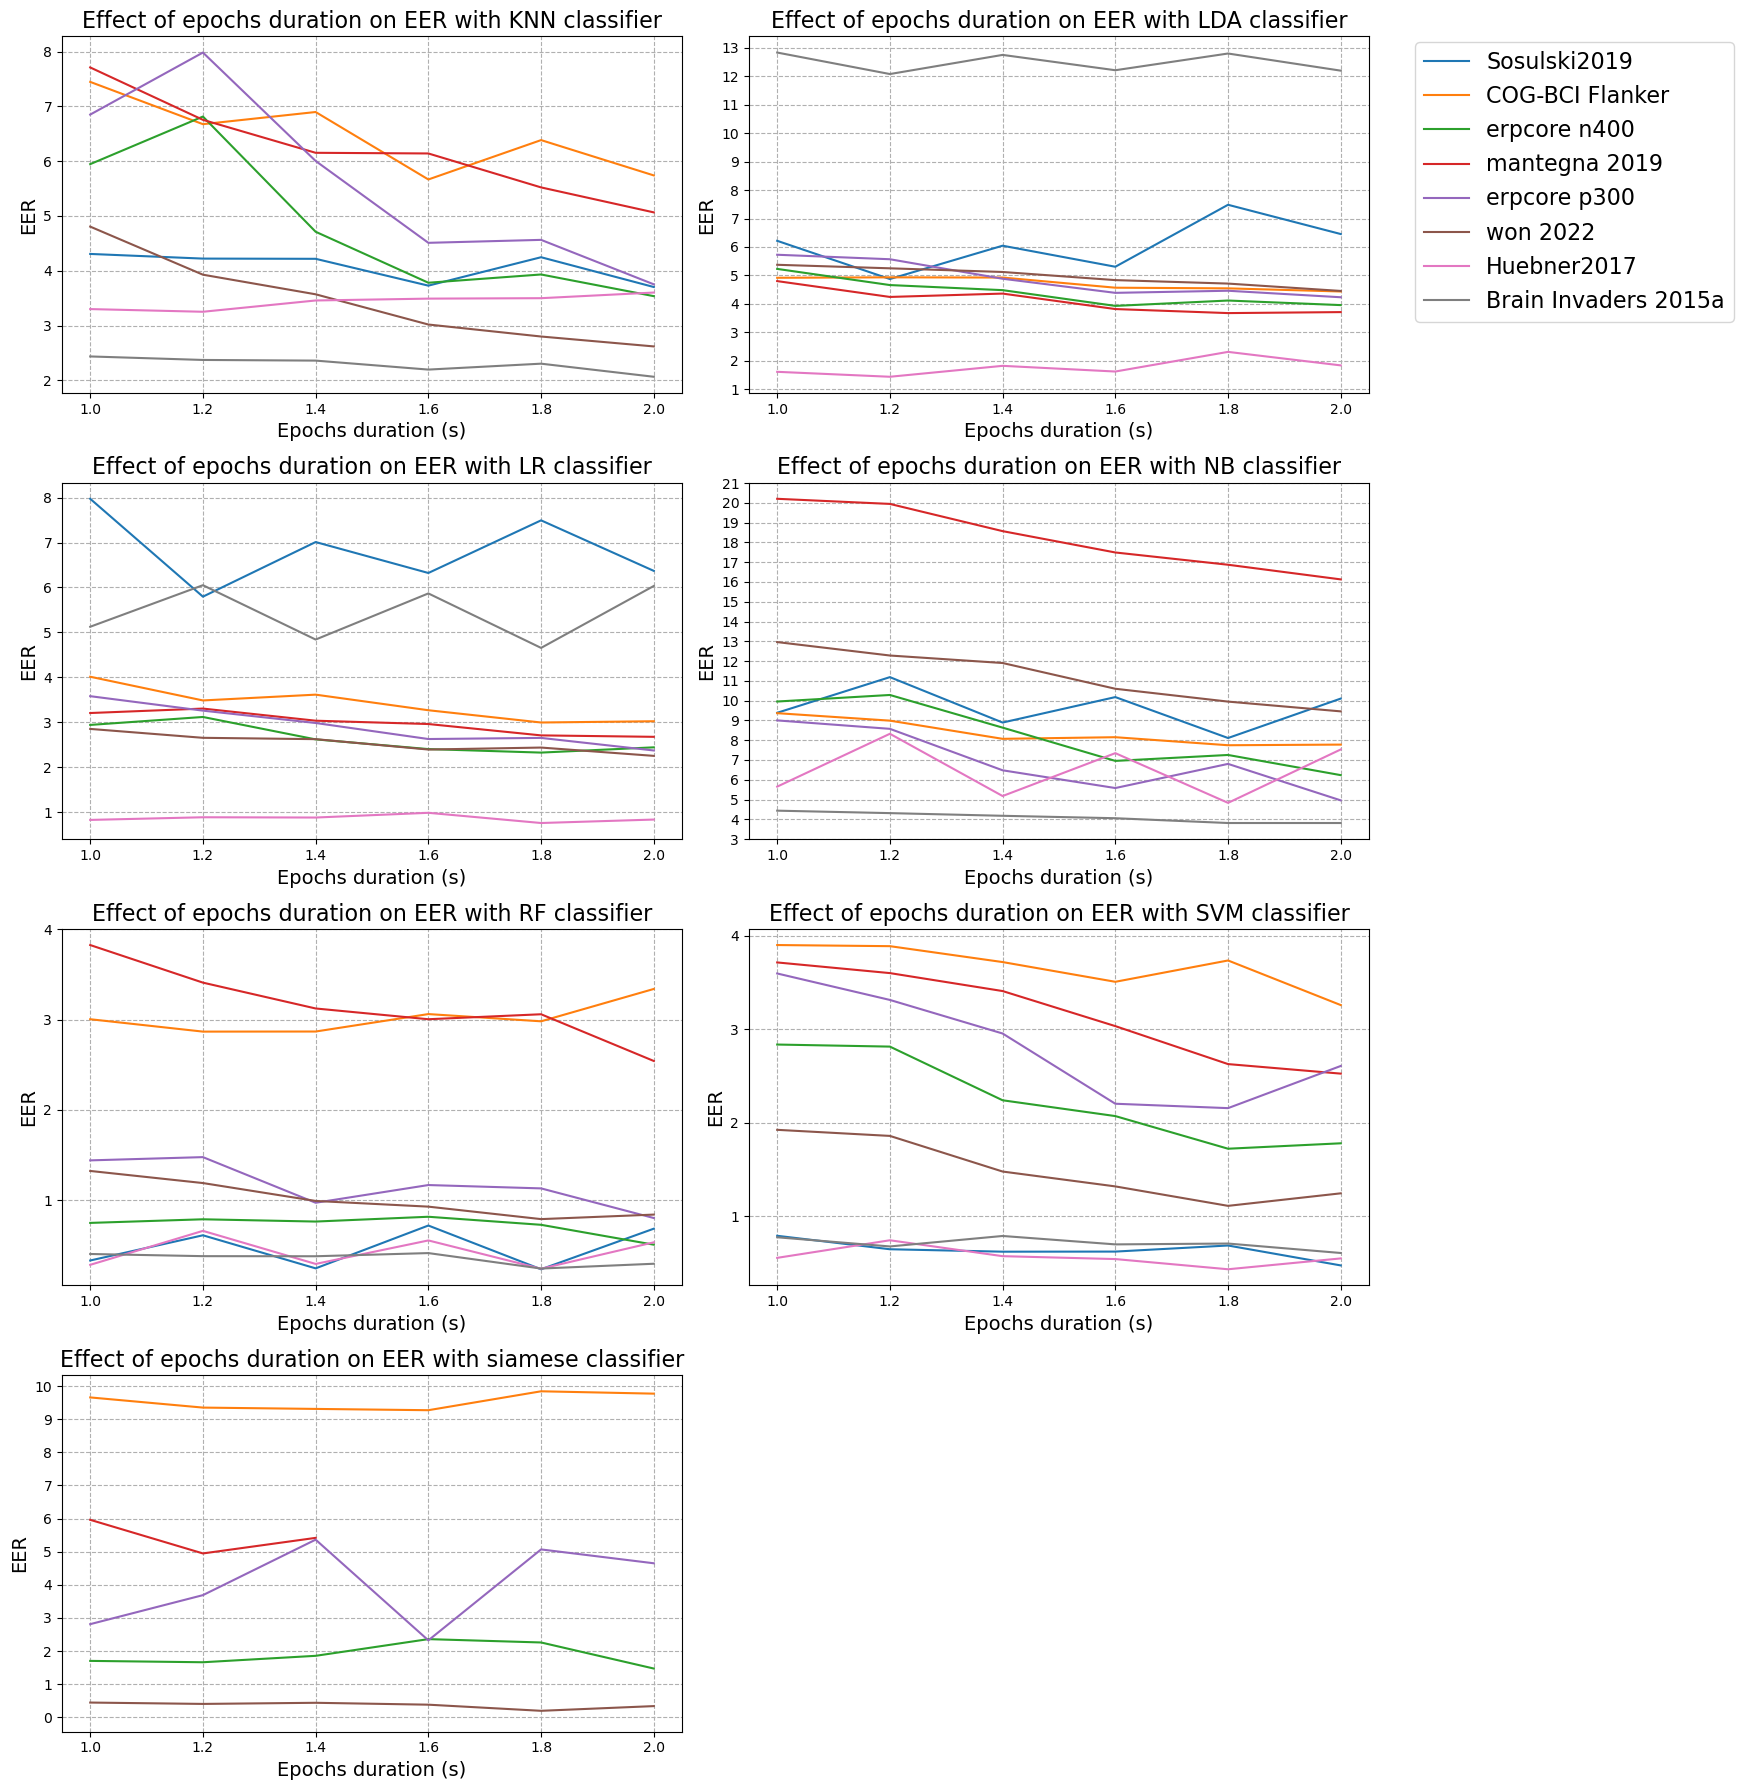

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(14, 18))

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_interval_df.pipeline.unique()):
    db = grouped_epochs_interval_df[grouped_epochs_interval_df['pipeline'] == pipeline]
    db['eer'] = db['eer'].astype('float64')

    # Choose the subplot for the current pipeline
    ax = axs[i]

    for dataset in set(db['dataset']):
        dataset_data = db[db['dataset'] == dataset]
        line, = ax.plot(dataset_data['epochs_duration'], dataset_data['eer'], label=dataset)
        legend_handles.append(line)

    # Set labels and title
    ax.set_xlabel('Epochs duration (s)', fontsize=14)
    ax.set_ylabel('EER', fontsize=14)
    ax.set_title("Effect of epochs duration on EER with "+ pipeline+" classifier", fontsize=16)

    # Set y-axis ticks at intervals of 1
    ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
    ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, set(grouped_epochs_interval_df['dataset']), loc='upper right', bbox_to_anchor=(1.25, 0.98), fontsize=12, prop={'size': 16})
plt.subplots_adjust(right=0.60)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.show()


================================================================================================================

<H1>Epochs Rejection</H1>

================================================================================================================


## Effects of Epochs Rejection


Under this Experiment, we analyze the effect of different epochs Rejection on the performance of our authentication systems across all the datasets. We tested the epochs Rejection such as 100, 150, 200, 250, 300, 350 and 400. Below Parameters were applied for conducting this experiment

<H3>Datasets</H3>

BrainInvaders15a, ERPCORE: N400, ERPCORE: N400, Mantegna2019, COG-BCI Flanker, Lee2019, Won2022,     Huebner2017, Sosulski2019

<H3>Utilized Parameters:</H3>

•   Filtering: Band Pass Filtering (1 to 50 Hz)

•   Epoch Interval: [-0.2, 0.8]

•   Baseline Correction Applied: Yes

•   Epochs Rejection threshold: 100, 150, 200, 250, 300, 350, 400

•   Features: AR (order=1), PSD

•   Classifiers: LDA, SVM, KNN, RF, NB, LR, Siamese 

•   Evaluation Type: Single-Session Evaluation

•   Threat Case: Open-Set

### Reading the results of dataset BrainInvaders15a

In [24]:
brain_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(brainInvaders_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))
siamese_results_path=os.path.join(brainInvaders_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
brain_siamese_df = pd.concat(dfs, ignore_index=True)                    

### Reading the results of dataset ERPCORE:N400

In [25]:
erpcCoreN400_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_N400_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset ERPCORE:P300

In [26]:
erpcCoreP300_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_P300_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset COGBCI-Flanker

In [27]:
cogbci_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension

print(os.listdir(siamese_results_path))
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
cogbci_siamese_df = pd.concat(dfs, ignore_index=True) 

['no_threshold_Results.csv', '200_threshold_Results.csv', '250_threshold_Results.csv', '100_threshold_Results.csv', '400_threshold_Results.csv', '350_threshold_Results.csv']


### Reading the results of dataset  Huebner2017

In [28]:
huebner_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Huebner_LLP_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Huebner_LLP_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
huebner_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset Sosulski2019

In [29]:
Soluski_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Sosulski2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Sosulski2019_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sosulski_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset Mantegna2019

In [30]:
mantegna_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Mantegna2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Mantegna2019_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
mantgena_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset Won2022

In [31]:
won2022_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
mwon2022_siamese_df = pd.concat(dfs, ignore_index=True) 

In [32]:
df_epochs_rejection_db=pd.concat([brain_epochsRejection_shallow_classifiers_db, brain_siamese_df,erpcCoreN400_epochsRejection_shallow_classifiers_db, erpCore_N400_siamese_df,
                                                          erpcCoreP300_epochsRejection_shallow_classifiers_db, erpCore_P300_siamese_df,
                                        cogbci_epochsRejection_shallow_classifiers_db, cogbci_siamese_df,huebner_epochsRejection_shallow_classifiers_db, cogbci_siamese_df, 
                                      Soluski_epochsRejection_shallow_classifiers_db, sosulski_siamese_df,
                                    mantegna_epochsRejection_shallow_classifiers_db, mantgena_siamese_df, won2022_epochsRejection_shallow_classifiers_db,
                                 won2022_shallow_classifiers_db], axis=0)

In [33]:
#df_epochs_rejection_db

In [34]:
df_epochs_rejection_db.drop(columns=['evaluation', 'Unnamed: 0'], inplace=True)
df_epochs_rejection_db['pipeline'] = df_epochs_rejection_db['pipeline'].apply(lambda x: x.split('+')[-1])
df_epochs_rejection_db['dataset'].replace({'Visual Speller LLP': "Huebner2017", 'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

### Grouping the results of Epochs Rejection

In [35]:
#df_sample_size.head()
grouped_epochs_rejection_df=df_epochs_rejection_db.copy()
grouped_epochs_rejection_df['eer_std'] = df_epochs_rejection_db['eer'].std()
#print(grouped_epochs_rejection_df)
grouped_epochs_rejection_df=grouped_epochs_rejection_df.groupby(['dataset', 'pipeline','Rejection_Threshold']).agg({
                #'accuracy': 'mean',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'eer_std':lambda x: f'{np.std(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

#grouped_df

In [36]:
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='siamese']

### Visualzing all the results of Eochs Rejection in subplots

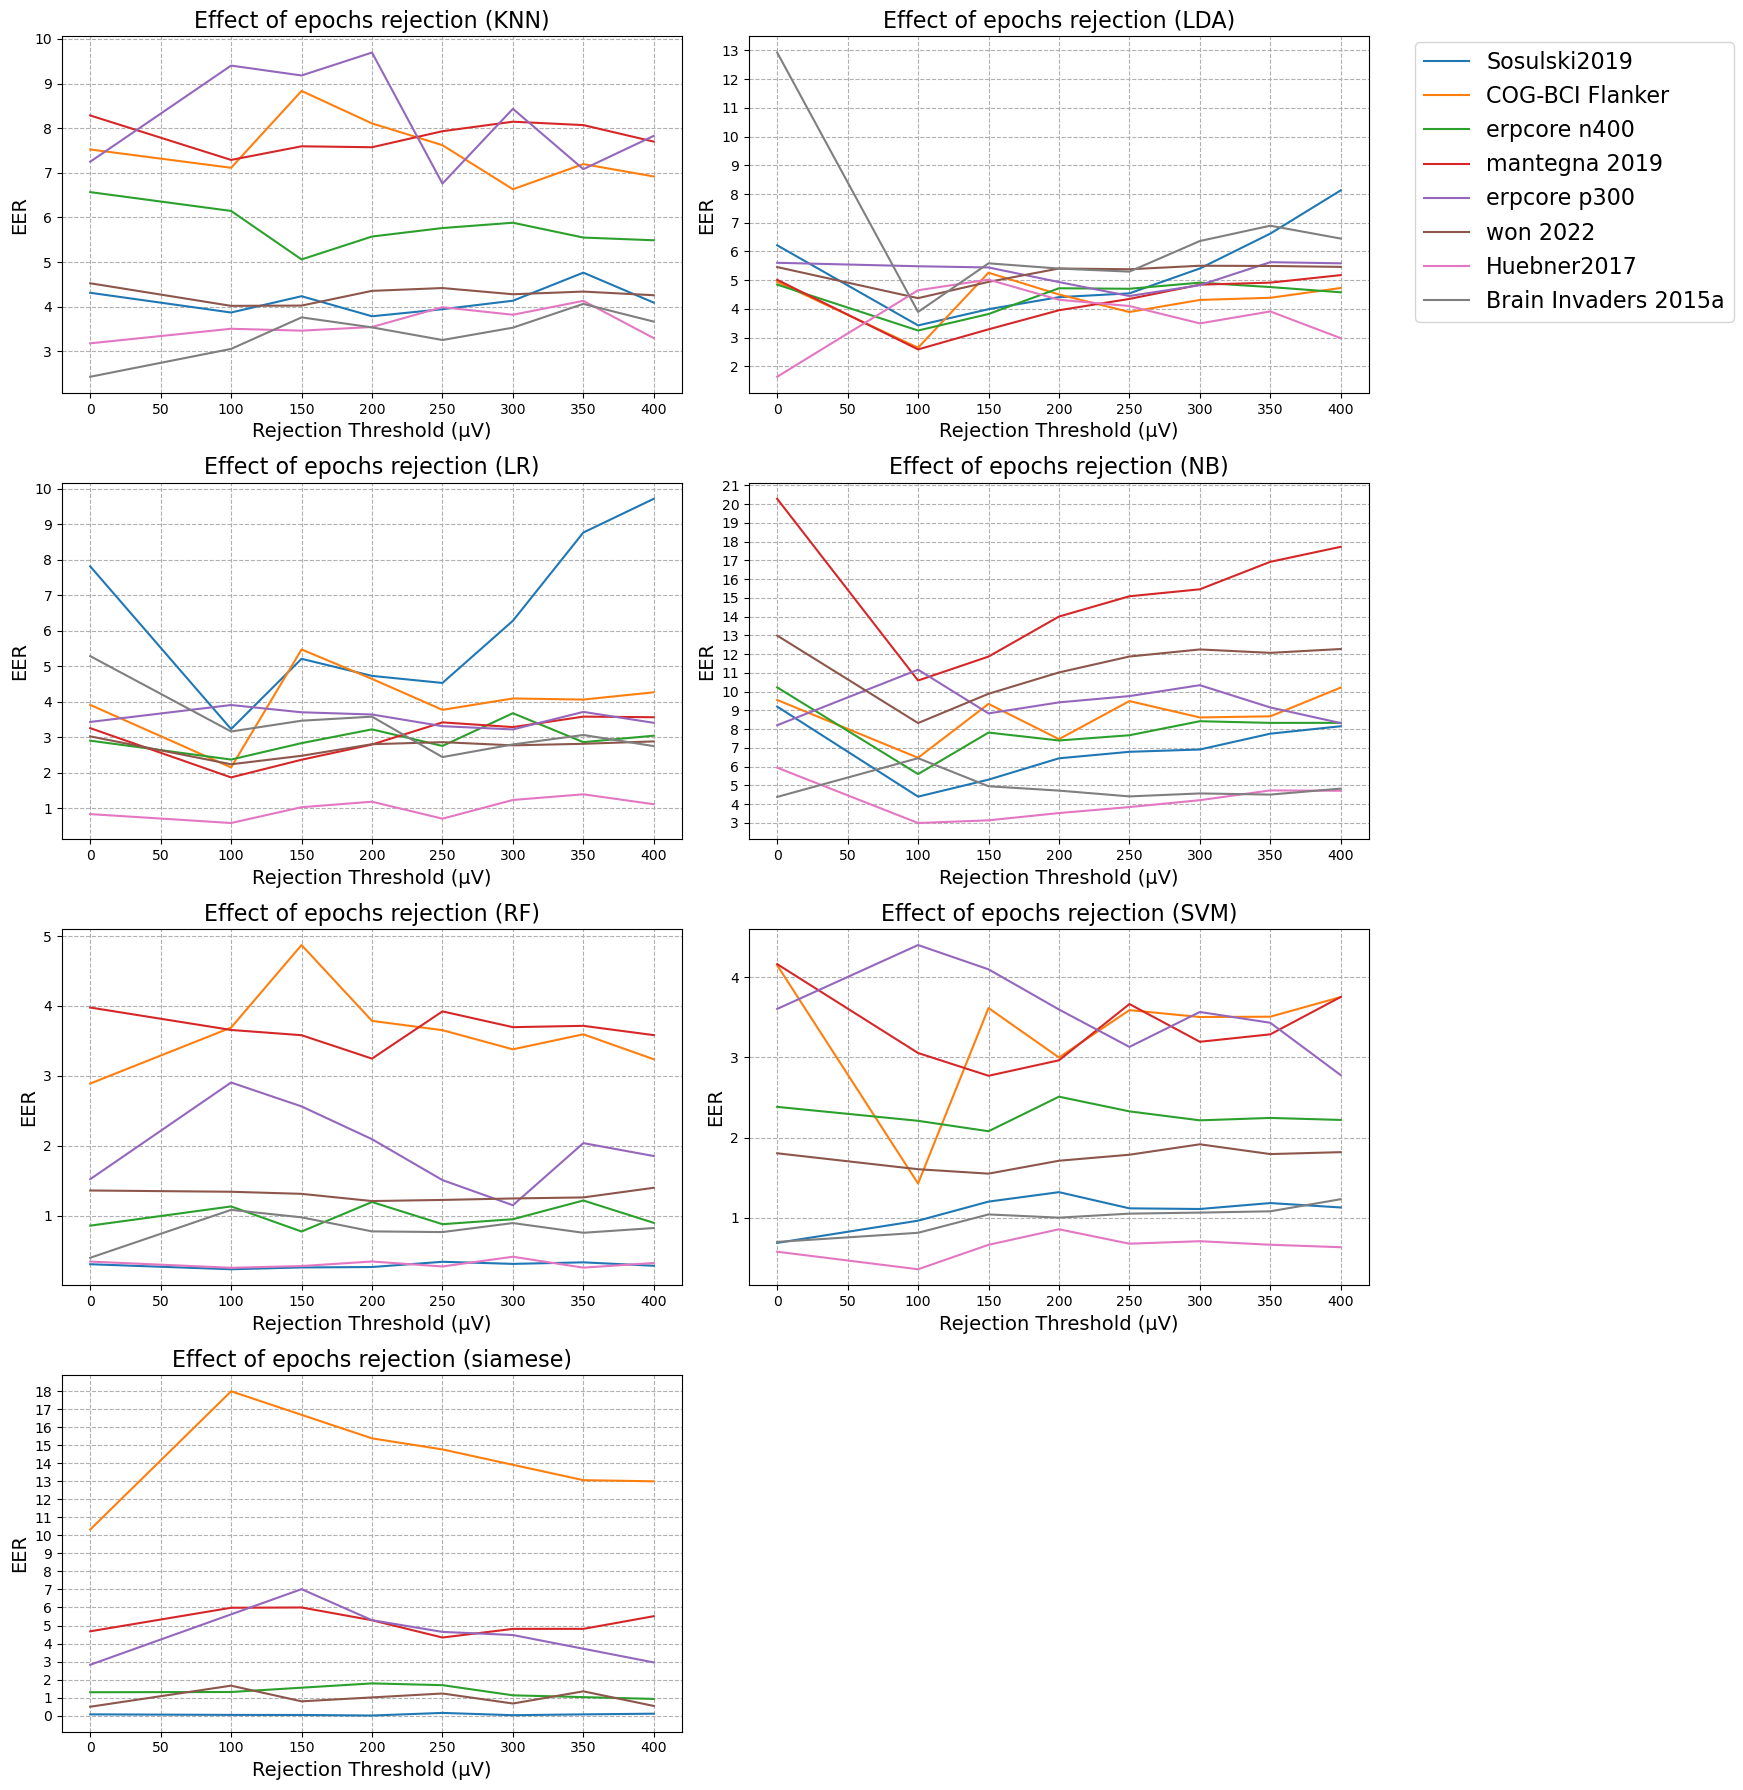

In [37]:
import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(14, 18))

#print(fig.)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    # Check if there are enough subplots for the pipelines
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in set(db['dataset']):
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], label=dataset)
            legend_handles.append(line)
            
#             # Add error bars to the line plot
#             ax.errorbar(dataset_data['Rejection_Threshold'], dataset_data['eer'], yerr=dataset_data['eer'], fmt='none', capsize=8)

        # Set labels and title

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=14)
        ax.set_ylabel('EER', fontsize=14)
        ax.set_title("Effect of epochs rejection (" + pipeline + ")", fontsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, set(grouped_epochs_rejection_df['dataset']), loc='upper right', bbox_to_anchor=(1.25, 0.98), fontsize=12, prop={'size': 16})
plt.subplots_adjust(right=0.60)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.show()


In [38]:
# import matplotlib.pyplot as plt

# # Load the DataFrame with the added column
# #grouped_epochs_rejection_df = pd.read_csv('grouped_epochs_rejection_with_std.csv')

# # Create subplots for each pipeline
# fig, axs = plt.subplots(4, 2, figsize=(14, 18))

# # Flatten the 2D array of subplots for easier iteration
# axs = axs.flatten()

# # Create an empty list to store legend handles and labels
# legend_handles = []

# # Iterate over each pipeline
# for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
#     # Check if there are enough subplots for the pipelines
#     if i < len(axs):
#         db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
#         db['eer'] = db['eer'].astype('float64')
#         db['eer_std'] = db['eer_std'].astype('float64')

#         # Choose the subplot for the current pipeline
#         ax = axs[i]

#         for dataset in set(db['dataset']):
#             dataset_data = db[db['dataset'] == dataset]
#             line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], label=dataset)
#             legend_handles.append(line)

# #             # Add shading to the line plot
# #             ax.fill_between(dataset_data['Rejection_Threshold'], dataset_data['eer'] - dataset_data['eer_std'],
# #                            dataset_data['eer'] + dataset_data['eer_std'], alpha=0.4, color=line.get_color())

#         # Set labels and title
#         ax.set_xlabel('Rejection Threshold (µV)', fontsize=14)
#         ax.set_ylabel('EER', fontsize=14)
#         ax.set_title("Effect of epochs rejection (" + pipeline + ")", fontsize=16)

#         # Set y-axis ticks at intervals of 1
#         ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
#         ax.grid(True, ls="--", lw=0.8)

# # Create a legend outside the subplots
# fig.legend(legend_handles, set(grouped_epochs_rejection_df['dataset']), loc='upper right', bbox_to_anchor=(1.25, 0.98), fontsize=12, prop={'size': 16})
# plt.subplots_adjust(right=0.60)   # Adjust layout to make room for the legend

# # Adjust layout
# plt.tight_layout()
# fig.delaxes(axs[7])
# plt.show()
